<a href="https://colab.research.google.com/github/BhardwajG572/21_day_21_projects/blob/main/Day_11_Assignment_Diffusion_model_usingStabilityAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Generating image for prompt: 'Batman playing football with Iron man on Mars'...


  0%|          | 0/50 [00:00<?, ?it/s]

Image generated successfully!


/usr/local/lib/python3.12/dist-packages/transformers/models/auto/modeling_auto.py:2242: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Device set to use cuda:0



Generating caption for the image...
Caption generated successfully!


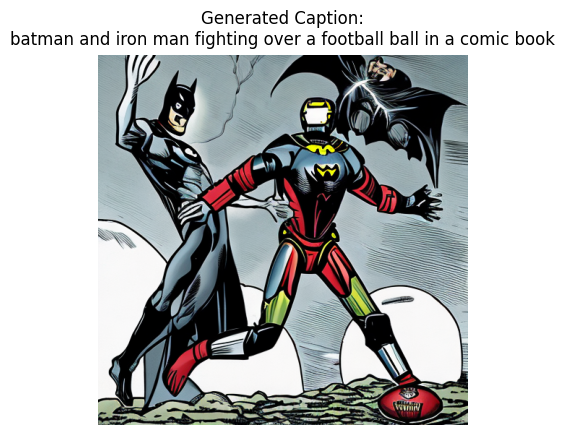


--- Summary ---
Initial Prompt: Batman playing football with Iron man on Mars
Generated Caption: batman and iron man fighting over a football ball in a comic book


In [ ]:
import torch
from diffusers import StableDiffusionPipeline
from transformers import pipeline
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Text-to-Image Generation : In this step , we are passing prompt (as text) into image using stable diffusion model

# Load the text-to-image model (Stable Diffusion)
text_to_image_model_id = "stabilityai/stable-diffusion-2-1-base"
text_to_image_pipe = StableDiffusionPipeline.from_pretrained(text_to_image_model_id, torch_dtype=torch.float16)

# Move the pipeline to the GPU if available for faster generation
device = "cuda" if torch.cuda.is_available() else "cpu"
text_to_image_pipe = text_to_image_pipe.to(device)

# prompt to generate the image
#prompt = "An astronaut riding a horse on Mars, high resolution, digital art"
prompt  = "Batman playing football with Iron man on Mars"

print(f"Generating image for prompt: '{prompt}'...")
# Generate the image
# The output is a PIL Image object, which is exactly what the next model needs
generated_image: Image.Image = text_to_image_pipe(prompt).images[0]
print("Image generated successfully!")


#Step 2: Image Captioning : we used this model : "Salesforce/blip-image-captioning-large"

# Load the image-to-text model
# This model is great for generating descriptive captions
image_captioning_pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-large")

print("\nGenerating caption for the image...")
# Generate the caption from the image we just created
# The captioning model returns a list of dictionaries
result = image_captioning_pipe(generated_image)
generated_caption = result[0]['generated_text']
print("Caption generated successfully!")


# Step 3: Display the Results

# Display the generated image and the generated caption
plt.imshow(generated_image)
plt.axis('off')
# Use plt.title to show the final generated caption
plt.title(f"Generated Caption:\n{generated_caption}", wrap=True, pad=10)
plt.show()

print("\n--- Summary ---")
print(f"Initial Prompt: {prompt}")
print(f"Generated Caption: {generated_caption}")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Generating image for prompt: 'An astronaut riding a horse on Mars, high resolution, digital art '...


  0%|          | 0/50 [00:00<?, ?it/s]

Image generated successfully!


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Device set to use cuda:0



Generating caption for the image...
Caption generated successfully!


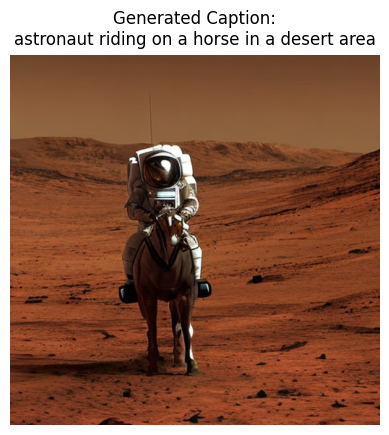


--- Summary ---
Initial Prompt: An astronaut riding a horse on Mars, high resolution, digital art 
Generated Caption: astronaut riding on a horse in a desert area


In [ ]:


import torch
from diffusers import StableDiffusionPipeline
from transformers import pipeline
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Text-to-Image Generation , we are using Stable Diffusion

text_to_image_model_id = "stabilityai/stable-diffusion-2-1-base"
text_to_image_pipe = StableDiffusionPipeline.from_pretrained(text_to_image_model_id, torch_dtype=torch.float16)

device = "cuda" if torch.cuda.is_available() else "cpu"
text_to_image_pipe = text_to_image_pipe.to(device)

# our prompt :

prompt = "An astronaut riding a horse on Mars, high resolution, digital art "

#prompt  = "Batman playing football with Iron man on Mars"

print(f"Generating image for prompt: '{prompt}'...")

generated_image: Image.Image = text_to_image_pipe(prompt).images[0]
print("Image generated successfully!")


# Step 2: Image Captioning : In this model we are using Image to text model

# Load the image-to-text model
# This model is great for generating descriptive captions  : for image captioning i have used this model : "Salesforce/blip-image-captioning-large"

image_captioning_pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-large")

print("\nGenerating caption for the image...")

result = image_captioning_pipe(generated_image)
generated_caption = result[0]['generated_text']
print("Caption generated successfully!")


# Step 3: Display the Results

# Display the generated image and the generated caption
plt.imshow(generated_image)
plt.axis('off')
# Use plt.title to show the final generated caption
plt.title(f"Generated Caption:\n{generated_caption}", wrap=True, pad=10)
plt.show()

print("\n--- Summary ---")
print(f"Initial Prompt: {prompt}")
print(f"Generated Caption: {generated_caption}")

##1. Model Selection
For this assignment, I chose the stabilityai/stable-diffusion-2-1-base model from the Hugging Face Hub. I selected this model for a few key reasons:

- High Performance: It is a well-known and powerful diffusion model, recognized for generating high-quality and coherent images.

- Excellent Support: It is seamlessly integrated with the diffusers library, making it straightforward to load and use the pipeline.

- Good Baseline: As a "base" model, it offers a great balance between image quality and the computational resources required to run it, making it a reliable starting point.

##2. Prompts and Parameters
I used the following descriptive prompt to generate the image:

> Prompt: "An astronaut riding a horse on Mars, high resolution, digital art"

- I deliberately included several key concepts ("astronaut," "horse," "Mars") and style descriptors ("high resolution," "digital art") to guide the model toward a specific aesthetic.
- For the other parameters, such as the number of inference steps and the guidance scale, I used the default settings of the StableDiffusionPipeline, as they are generally optimized for producing good results without manual tuning.

##3. Observations on Image Quality
The generated image successfully interpreted the core concepts of the prompt. It produced a clear image of a figure in an astronaut suit on a horse, set against a reddish, Mars-like landscape. The "digital art" style is evident in the image's texture and lighting. The model did an excellent job of blending the unusual elements of the prompt into a single, cohesive scene. The resolution and detail are impressive, showcasing the model's advanced capabilities.

## 4. Challenges and Interesting Findings
A key challenge in working with text-to-image models is prompt engineering. The final output is extremely sensitive to the wording of the prompt.
It often requires several attempts to find the right combination of words to achieve a desired result.

The most interesting finding was how simple and accessible the diffusers library makes this advanced technology. With just a few lines of Python, it's possible to load a state-of-the-art model and generate a unique piece of art. My extended experiment, where I chained this model with an image-captioning model, was particularly insightful.

It demonstrated that the generated image is not just a collection of pixels but contains enough coherent information to be accurately described by another AI model. This highlights the potential for combining different models to create more complex and intelligent applications.